In [2]:
from sympy import *
from scipy.stats import *
import numpy as np
import pandas as pd
from math import tanh, atanh
import matplotlib.pyplot as plt
import random

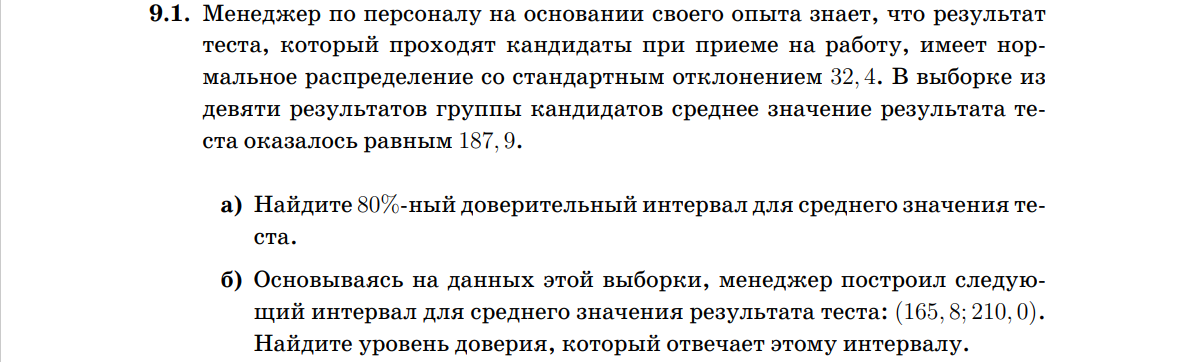

In [2]:
# случай известной дисперсии
sgm = 32.5
xm = 187.9
n = 9
gamma = 0.8
alpha = 1 - gamma

In [3]:
Z = norm(0, 1)
teta1 = xm - Z.isf(alpha/2)*sgm/n**0.5
teta2 = xm + Z.isf(alpha/2)*sgm/n**0.5
teta1, teta2

(174.01652470660017, 201.78347529339985)

In [4]:
Z.isf(0.4)

0.2533471031357997

In [5]:
theta1 = 165.8
theta2 = 210
Z_ = (theta2 - xm) * n**0.5 / sgm
gamma = 1 - norm.sf(Z_) # обратная функция isf
gamma

0.9793248371339299

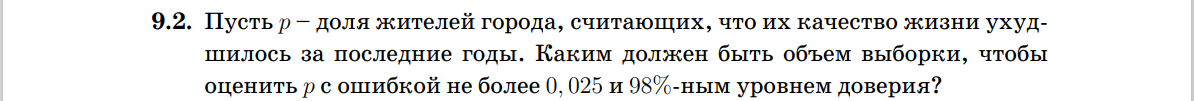

In [6]:
gamma = 0.98
delta = 0.025 # delta = 0.5(teta2 - teta1)
alpha = 1 - gamma

teta1 = p - norm.isf(alpha/2)

NameError: name 'p' is not defined

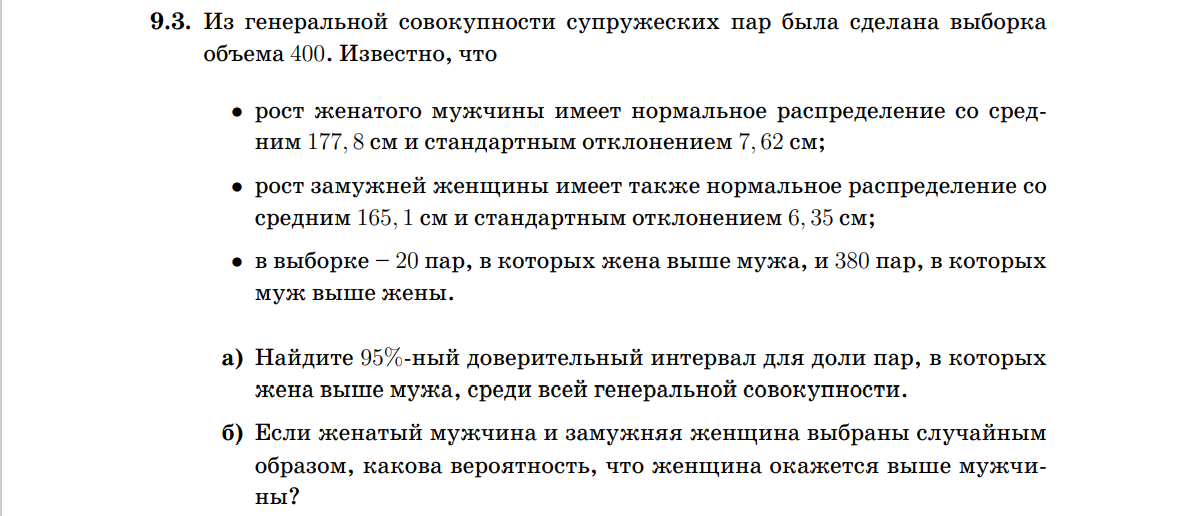

In [ ]:
n = 400
rm_m = 177.8
sgmm = 7.62

rzj_m = 165.1
sgmj = 6.35

n1 = 20
n2 = 380

In [ ]:
gamma = 0.95
alpha = 1 - gamma

In [ ]:
p = 20/400
q = 1 - p
delta = (p*q)**0.5*norm.isf(alpha/2)
teta1 = rzj_m - delta
teta2 = rzj_m + delta
teta1, teta2

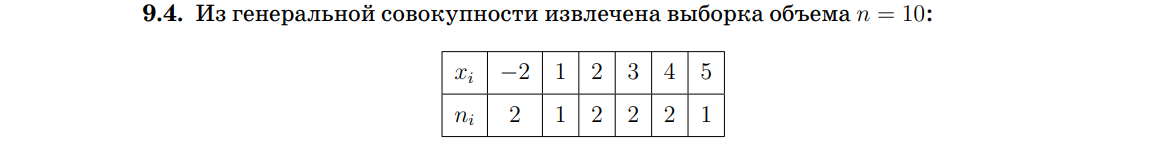

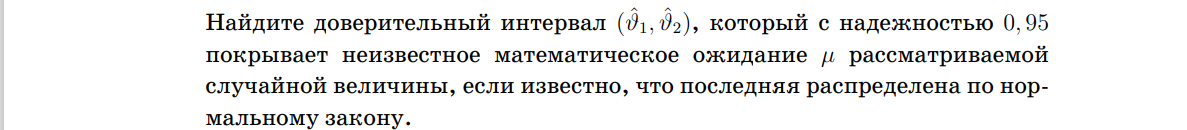

In [7]:
n = 10 
gamma = 0.95
alpha = 1 - gamma
x = np.array([-2, 1, 2, 3, 4 ,5])
n = np.array([2/10, 1/10, 2/10, 2/10, 2/10, 1/10])
raspr = rv_discrete(values=(x, n))
raspr.mean()

2.0

In [8]:
T = t(10 - 1)
n = 10
S = (n/(n-1)*raspr.var())**0.5
teta1 = raspr.mean() - T.isf(alpha/2)*S/n**0.5
teta2 =  raspr.mean() + T.isf(alpha/2)*S/n**0.5
teta1, teta2

(0.28049599688715343, 3.7195040031128466)

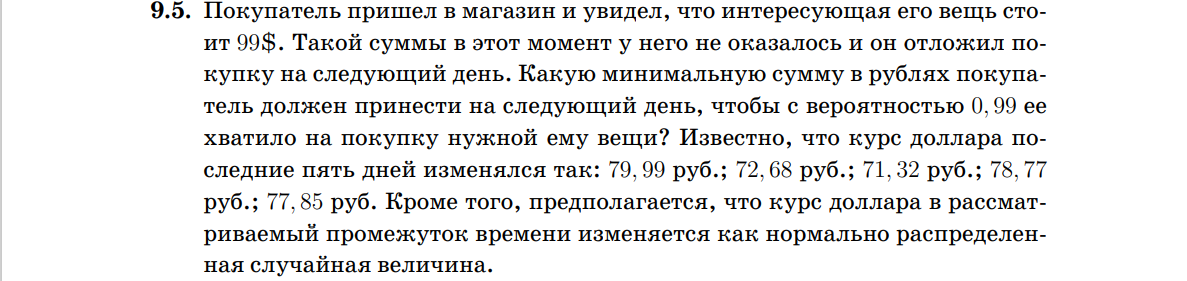

In [9]:
x = [79.99, 72.68, 71.32, 78.77, 77.85]
y = [1/5]*5
T = t(5-1)
n = 5
alpha = 1 - 0.99
R = rv_discrete(values=(x, y))
S = (R.var()*5/4)**0.5
teta1 = R.mean() - T.isf(alpha/2)*S/n**0.5
teta2 =  R.mean() + T.isf(alpha/2)*S/n**0.5
teta1, teta2

(68.15639160838076, 84.08760839161924)

In [76]:
# 76 122
# S = 3 869
y

[0.2, 0.2, 0.2, 0.2, 0.2]

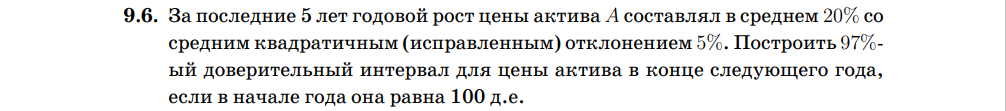

In [20]:
n = 5
xmean = 0.2
s = 0.05
gamma = 0.97
alpha = 1 - gamma
val0 = 100

T = t(n-1)

teta1 = xmean - T.isf(alpha)*s*(1 + 1/n)**0.5
teta2 = xmean + T.isf(alpha)*s*(1 + 1/n)**0.5

(1 + teta1)*100, (1 + teta2)*100

(105.75503988609098, 134.24496011390903)

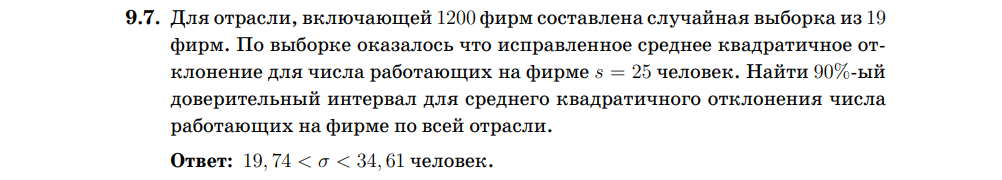

In [32]:
N = 1200
n = 19
s = 25
gamma = 0.9
alpha = 1 - gamma
Xi = chi2(n - 1)

teta1 = (n - 1)*s**2/Xi.isf(alpha/2)
teta2 = (n - 1)*s**2/Xi.isf(1 - alpha/2)
teta1**0.5, teta2**0.5

(19.740499552627163, 34.61249782279546)

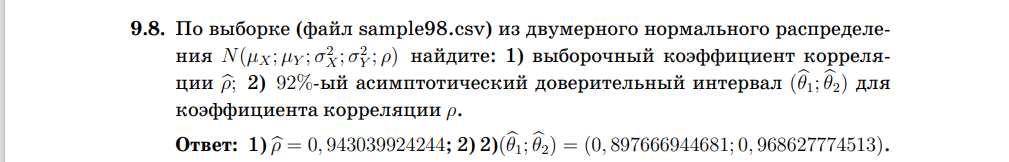

In [71]:
sample = pd.read_csv('sample98.csv', delimiter=';', header=None)
sample98 = np.array(sample)
len(sample98)

36

In [72]:
po_ = np.corrcoef(sample[0], sample[1])[0][1]
po_

0.9430399242709795

In [74]:
gamma = 0.92
alpha = 1 - gamma
n = len(sample)
Z = norm(0,1)

teta1 = tanh(atanh(po_) - Z.isf(alpha/2)/(n-3)**0.5)
teta2 = tanh(atanh(po_) + Z.isf(alpha/2)/(n-3)**0.5)

teta1, teta2

(0.8976669447274579, 0.9686277745278846)

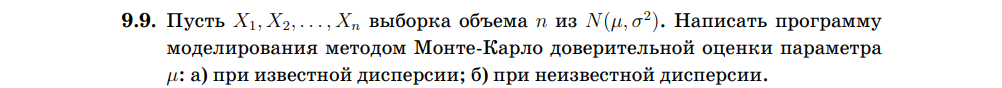

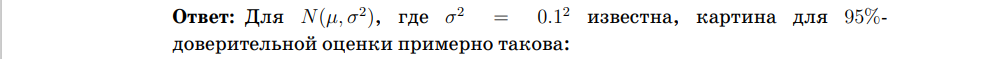

In [9]:
mu = np.random.uniform(0, 10)
sgm = 0.1
Z = norm(mu, sgm)
gamma = 0.95
alpha = 1 - gamma

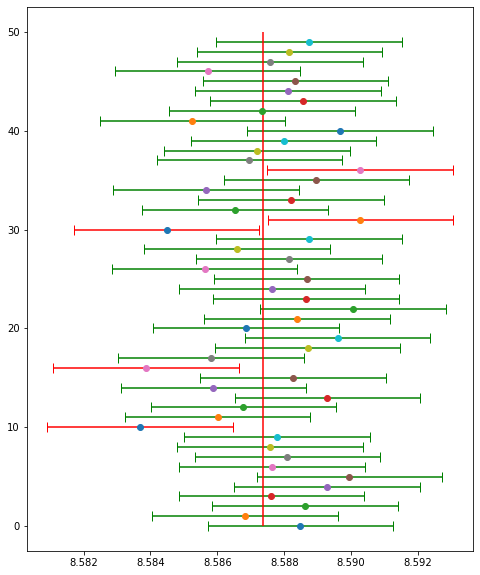

In [13]:
general = norm.rvs(loc=mu, scale=sgm, size=10000)
lst = []
fig, ax = plt.subplots(figsize=(8, 10))
for i in range(50):
    sample = np.random.choice(general, size=5000)
    teta1 = sample.mean() - norm.isf(alpha/2)*sgm/len(sample)**0.5
    teta2 = sample.mean() + norm.isf(alpha/2)*sgm/len(sample)**0.5
    lst.append((teta1, teta2))

k = -1
for interval in lst:
    k += 1
    if interval[0] < general.mean() < interval[1]:
         plt.errorbar(x=(0.5*(interval[0] + interval[1])), y=k, xerr=(interval[1] - interval[0])/2, ecolor='g', fmt='-o', 
                     capsize=5)
    else:
        plt.errorbar(x=(0.5*(interval[0] + interval[1])), y=k, xerr=(interval[1] - interval[0])/2, ecolor='r', fmt='-o', 
                     capsize=5)

plt.vlines(ymin=0, x=general.mean(), ymax=len(lst), color='r')
        
plt.show()

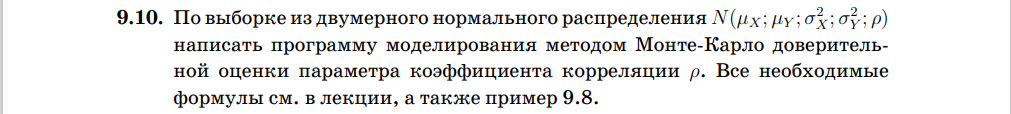

In [4]:
cov = np.array([[6, 3], [3, 3.5]])
gen = np.random.multivariate_normal([2, 1], cov, size=10000)
gamma = 0.92
alpha = 1 - gamma

In [6]:
po_v = np.corrcoef(gen[:,0], gen[:,1])[0][1]
po_v

0.6556916721834015

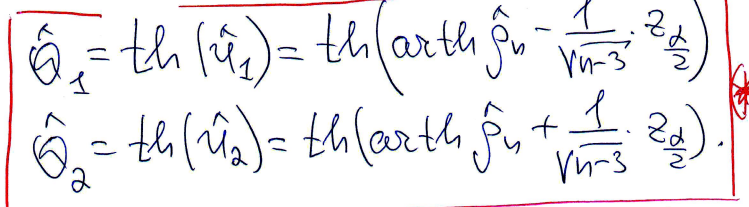

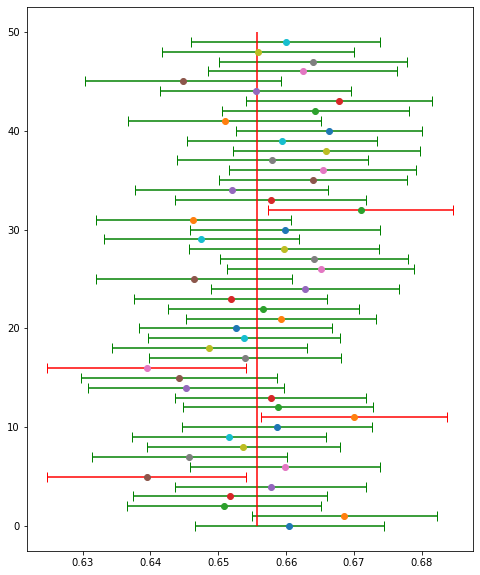

In [18]:
lst = []
fig, ax = plt.subplots(figsize=(8, 10))

for i in range(50):
    sample = np.array([list(random.choice(gen)) for i in range(5000)])
    po = np.corrcoef(sample[:,0], sample[:,1] )[0][1]
    teta1 = tanh(atanh(po) - 1/(5000 - 3)**0.5 * norm.isf(alpha/2))
    teta2 = tanh(atanh(po) + 1/(5000 - 3)**0.5 * norm.isf(alpha/2))
    lst.append((teta1, teta2))

k = -1
for interval in lst:
    k += 1
    if interval[0] <= po_v <= interval[1]:
        #print(interval)
        plt.errorbar(x=(0.5*(interval[0] + interval[1])), y=k, xerr=(interval[1] - interval[0])/2, ecolor='g', fmt='-o', 
                     capsize=5)
    else:
        plt.errorbar(x=(0.5*(interval[0] + interval[1])), y=k, xerr=(interval[1] - interval[0])/2, ecolor='r', fmt='-o', 
                     capsize=5)

plt.vlines(ymin=0, x=po_v, ymax=len(lst), color='r')
        
#plt.show()

In [22]:
sample = [random.choice(gen) for i in range(5000)]
sample

[array([0.93233463, 2.1760731 ]),
 array([1.13731155, 2.26548237]),
 array([0.44578988, 1.20151756]),
 array([-0.51625653,  0.24110855]),
 array([1.38627168, 2.20431315]),
 array([ 1.08034981, -2.15221962]),
 array([-0.97889845, -0.11671225]),
 array([1.76061205, 0.90239346]),
 array([-0.3769986 ,  0.99656542]),
 array([1.57536006, 0.16843758]),
 array([-1.06350468, -3.70757324]),
 array([6.9694998 , 2.70282741]),
 array([2.6900899 , 2.01201207]),
 array([1.60908818, 1.18099233]),
 array([3.54629434, 0.3590763 ]),
 array([3.40125426, 0.07959041]),
 array([5.04817919, 0.04541846]),
 array([3.59141847, 0.91561299]),
 array([ 0.11173482, -0.87439975]),
 array([-1.58967448, -2.17969369]),
 array([6.12053717, 3.765183  ]),
 array([-0.14914279, -0.31575631]),
 array([-0.5447627 ,  0.78123722]),
 array([4.4137992 , 3.23405335]),
 array([3.76366493, 2.1726205 ]),
 array([5.70278682, 0.56376612]),
 array([ 0.02131276, -0.34187403]),
 array([1.58121793, 2.09820472]),
 array([0.13794907, 2.878187

In [16]:
po_v

0.6556916721834015